In [10]:
# Install necessary libraries if not already installed
# pip install pandas openpyxl matplotlib seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
# Load the dataset from the Excel file
file_path = 'IPC DATASET.xlsx'
df = pd.read_excel(file_path)

In [6]:
# Display the first few rows of the dataset to understand its structure
print(df.head())


  SECTION_ID                                       SECTION_NAME  \
0          1          Title and extent of operation of the Code   
1          2      Punishment of offences committed within India   
2          3  Punishment of offences committed beyond, but w...   
3          4    Extension of Code to extra-territorial offences   
4          5        Certain laws not to be affected by this Act   

                                         DESCRIPTION  \
0  This section establishes the title and scope o...   
1  This section clarifies that every person shall...   
2  This section deals with offenses committed out...   
3  This section outlines the circumstances under ...   
4  This section clarifies that the enactment of t...   

                                          PUNISHMENT  
0  Not applicable (This section primarily provide...  
1  Not applicable (This section provides a jurisd...  
2  Not applicable (This section provides a jurisd...  
3  Not applicable (This section provides

In [9]:
df.columns

Index(['SECTION_ID', 'SECTION_NAME', 'DESCRIPTION', 'PUNISHMENT'], dtype='object')

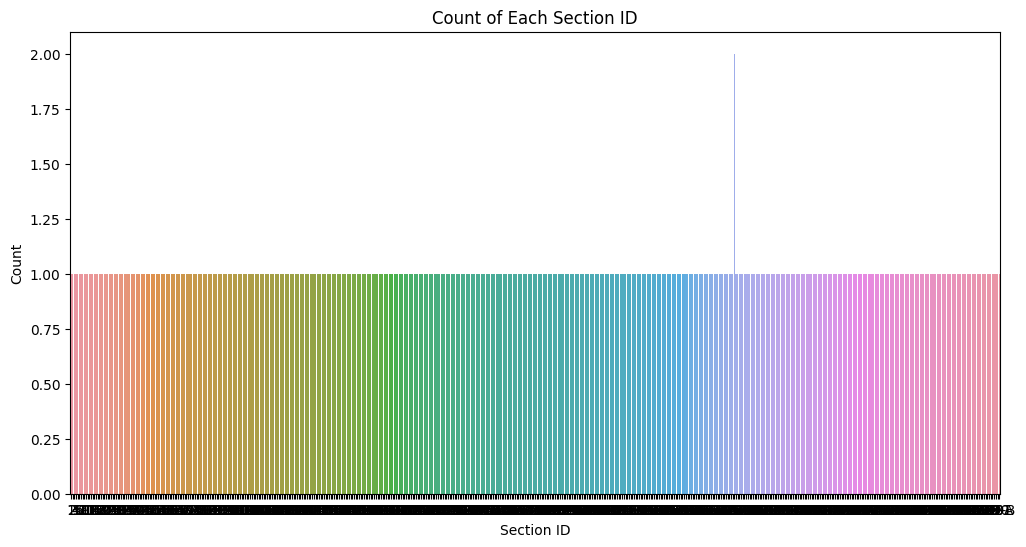

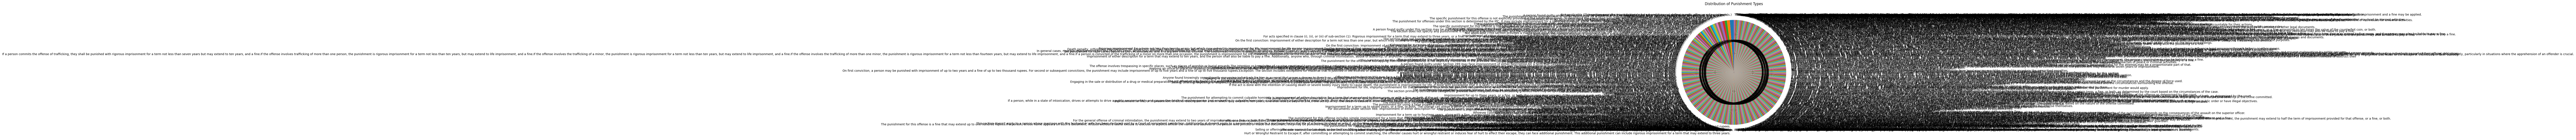

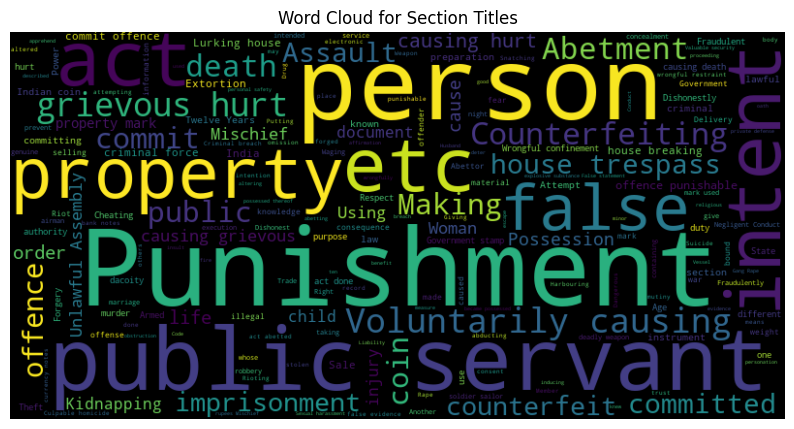

In [12]:
# Bar plot for the count of each Section ID
plt.figure(figsize=(12, 6))
sns.countplot(x='SECTION_ID', data=df)
plt.title('Count of Each Section ID')
plt.xlabel('Section ID')
plt.ylabel('Count')
plt.show()

# Pie chart for the distribution of Punishment types
plt.figure(figsize=(8, 8))
df['PUNISHMENT'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Punishment Types')
plt.show()

# Word cloud for Section Titles
from wordcloud import WordCloud

# Combine all Section Titles into a single string
text = ' '.join(df['SECTION_NAME'].astype(str))

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110).generate(text)

# Plot word cloud
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Word Cloud for Section Titles')
plt.show()


In [24]:
# Take user input
#user_input = input("Enter a keyword or sentence: ")
user_input = 'Assault'


In [31]:
# Filter the DataFrame based on the user input
filtered_df = df[df.apply(lambda row: user_input.lower() in row['SECTION_NAME'].lower() or
                                     user_input.lower() in row['DESCRIPTION'].lower() or
                                     user_input.lower() in row['PUNISHMENT'].lower(), axis=1)]

# Display the filtered DataFrame
print(filtered_df['SECTION_NAME'])

13            When such abetment constitutes an offence.
101                                Punishment for murder
303                                               Murder
305                                Punishment for murder
306                Punishment for murder by life-convict
307    Punishment for culpable homicide not amounting...
312                                    Attempt to Murder
313                  Attempt to commit Culpable Homicide
315                                                 Thug
316                                  Punishment for Thug
322    Exposure and Abandonment of Child Under Twelve...
377           Kidnapping or abducting in order to murder
431                                  Dacoity with murder
Name: SECTION_NAME, dtype: object


In [27]:
from googletrans import Translator

In [30]:
# Take user input in English
# user_input = input("Enter a keyword or sentence in English: ")
user_input = 'Murder'


In [32]:
# Translate the user input to Marathi
translator = Translator()
user_input_marathi = translator.translate(user_input, dest='mr').text


In [34]:
# Filter the DataFrame based on the user input
filtered_df = df[df.apply(lambda row: user_input.lower() in row['SECTION_NAME'].lower() or
                                     user_input.lower() in row['DESCRIPTION'].lower() or
                                     user_input.lower() in row['PUNISHMENT'].lower(), axis=1)]

# Translate the relevant columns to Marathi
filtered_df['Section Title (Marathi)'] = filtered_df['SECTION_NAME'].apply(lambda x: translator.translate(x, dest='mr').text)
filtered_df['Description (Marathi)'] = filtered_df['DESCRIPTION'].apply(lambda x: translator.translate(x, dest='mr').text)
filtered_df['Punishment (Marathi)'] = filtered_df['PUNISHMENT'].apply(lambda x: translator.translate(x, dest='mr').text)

# Display the filtered DataFrame with Marathi translations
print(filtered_df[['Section Title (Marathi)', 'Description (Marathi)', 'Punishment (Marathi)']])



C:\Users\VAIBHAV\AppData\Local\Temp\ipykernel_14412\3294564829.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Section Title (Marathi)'] = filtered_df['SECTION_NAME'].apply(lambda x: translator.translate(x, dest='mr').text)
C:\Users\VAIBHAV\AppData\Local\Temp\ipykernel_14412\3294564829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Description (Marathi)'] = filtered_df['DESCRIPTION'].apply(lambda x: translator.translate(x, dest='mr').text)


                               Section Title (Marathi)  \
13      जेव्हा अशा प्रकारच्या अत्याचाराचा गुन्हा होतो.   
101                                     हत्येची शिक्षा   
303                                                खून   
305                                     हत्येची शिक्षा   
306                       जीवन-दोषींनी खुनासाठी शिक्षा   
307     हत्येची रक्कम नाही तर दोषी हत्याकांडाची शिक्षा   
312                               खून करण्याचा प्रयत्न   
313                    दोषी हत्याकांड करण्याचा प्रयत्न   
315                                                 ठग   
316                                          ठग शिक्षा   
322  पालकांनी किंवा त्याची काळजी घेतलेल्या व्यक्तीद...   
377         खून करण्यासाठी अपहरण करणे किंवा अपहरण करणे   
431                                     हत्येसह डॅकोटी   

                                 Description (Marathi)  \
13   हा विभाग अशा परिस्थितीशी संबंधित आहे जेथे एबेट...   
101  आयपीसीच्या कलम १०२ मध्ये हत्येच्या गुन्ह्यासाठ...   
303  १) विशिष

C:\Users\VAIBHAV\AppData\Local\Temp\ipykernel_14412\3294564829.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Punishment (Marathi)'] = filtered_df['PUNISHMENT'].apply(lambda x: translator.translate(x, dest='mr').text)


In [37]:
import time

In [38]:
# Load the dataset from the Excel file
file_path = 'IPC DATASET.xlsx'
df = pd.read_excel(file_path)

# Function to translate a DataFrame to a specified language with a delay
def translate_df_with_delay(df, language, delay=2):
    translator = Translator()
    translated_df = df.applymap(lambda x: translate_with_retry(x, translator, language, delay))
    return translated_df

def translate_with_retry(text, translator, language, delay):
    while True:
        try:
            translation = translator.translate(str(text), dest=language)
            time.sleep(delay)  # Introduce a delay to avoid timeouts
            return translation.text
        except Exception as e:
            print(f"Translation error: {e}")
            time.sleep(delay)  # Retry after a delay if there is an error

# Translate the entire dataset to Marathi with a delay of 2 seconds between requests
marathi_df = translate_df_with_delay(df, 'mr', delay=2)

# Save the Marathi-translated dataset to a nezw Excel file
marathi_file_path = 'Marathi_Dataset.xlsx'
marathi_df.to_excel(marathi_file_path, index=False)


Translation error: The read operation timed out
Translation error: timed out
Translation error: timed out
Translation error: timed out
Translation error: timed out
Translation error: The read operation timed out
Translation error: [Errno 11001] getaddrinfo failed
Translation error: [Errno 11001] getaddrinfo failed
Translation error: [Errno 11001] getaddrinfo failed
Translation error: [Errno 11001] getaddrinfo failed
Translation error: _ssl.c:989: The handshake operation timed out
Translation error: The read operation timed out
Translation error: [WinError 10054] An existing connection was forcibly closed by the remote host


In [40]:
import pandas as pd
from googletrans import Translator
import time

# Load the dataset from the Excel file
file_path = 'IPC DATASET.xlsx'
df = pd.read_excel(file_path)

# Function to translate a DataFrame to a specified language with a delay
def translate_df_with_delay(df, language, delay=2):
    translator = Translator()
    translated_df = df.applymap(lambda x: translate_with_retry(x, translator, language, delay))
    return translated_df

def translate_with_retry(text, translator, language, delay):
    while True:
        try:
            translation = translator.translate(str(text), dest=language)
            time.sleep(delay)  # Introduce a delay to avoid timeouts
            return translation.text
        except Exception as e:
            print(f"Translation error: {e}")
            time.sleep(delay)  # Retry after a delay if there is an error

# Translate the entire dataset to Hindi with a delay of 2 seconds between requests
hindi_df = translate_df_with_delay(df, 'hi', delay=2)

# Save the Hindi-translated dataset to a new Excel file
hindi_file_path = 'Hindi_Dataset.xlsx'/hindi_df.to_excel(hindi_file_path, index=False)


Translation error: [Errno 11001] getaddrinfo failed
Translation error: [Errno 11001] getaddrinfo failed
Translation error: [Errno 11001] getaddrinfo failed
Translation error: [Errno 11001] getaddrinfo failed
Translation error: [Errno 11001] getaddrinfo failed


In [8]:
from indic_transliteration import sanscript
from indic_transliteration.sanscript import transliterate

# Function to transliterate English to Devanagari (common for Hindi and Marathi)
def transliterate_to_devanagari(word):
    return transliterate(word, sanscript.ITRANS, sanscript.DEVANAGARI)

# Example usage
english_word = 'rape'
devanagari_word = transliterate_to_devanagari(english_word)
print(f"{english_word} in Devanagari script: {devanagari_word}")


rape in Devanagari script: रपे


In [14]:
user_input = 'बलात्कार'
# Load the dataset from the Excel file
file_path = 'Marathi_Dataset.xlsx'
df = pd.read_excel(file_path)
# Filter the DataFrame based on the user input
filtered_df = df[df.apply(lambda row: user_input.lower() in row['SECTION_NAME'].lower() or
                                     user_input.lower() in row['DESCRIPTION'].lower() or
                                     user_input.lower() in row['PUNISHMENT'].lower(), axis=1)]

# Display the filtered DataFrame
print(filtered_df)


    SECTION_ID                                       SECTION_NAME  \
214        215  बलात्कार करणे आणि त्या व्यक्तीला मृत्यूच्या भी...   
392        375                                           बलात्कार   
393        376                                 बलात्काराची शिक्षा   
394      376-ए  मृत्यूला कारणीभूत किंवा बळीची सतत वनस्पतिवत् ह...   
395     376-एए   बारा वर्षांपर्यंतच्या महिलेवर बलात्काराची शिक्षा   
396     376-डी  बारा वर्षांच्या एका महिलेवर सामूहिक बलात्काराच...   
397     376-अब  बारा वर्षांपेक्षा कमी वयाच्या महिलेवर बलात्कार...   
399     376-सी   प्राधिकरणातील एखाद्या व्यक्तीद्वारे लैंगिक संभोग   
400     376-डी                                       गँग बलात्कार   
401    376-आणि  सोळा वर्षांपेक्षा कमी वयाच्या महिलेवर सामूहिक ...   
402   376-डीबी  बारा वर्षांपेक्षा कमी वयाच्या महिलेवर सामूहिक ...   
404     376-एफ  गुन्ह्याबद्दल माहिती देण्यासाठी कामाच्या ठिकाण...   

                                           DESCRIPTION  \
214  कलम 215 बलात्काराशी संबंधित विशिष्ट परि